In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def drawImg(img, title="Image", cmap='gray'):
    plt.axis("off")
    plt.style.use("seaborn-v0_8")
    plt.imshow(img, cmap=cmap)
    plt.title(title + str(img.shape))
    plt.show()

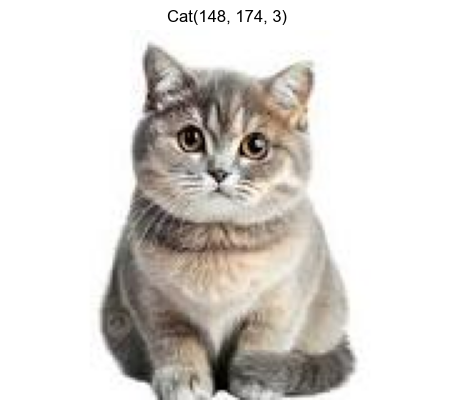

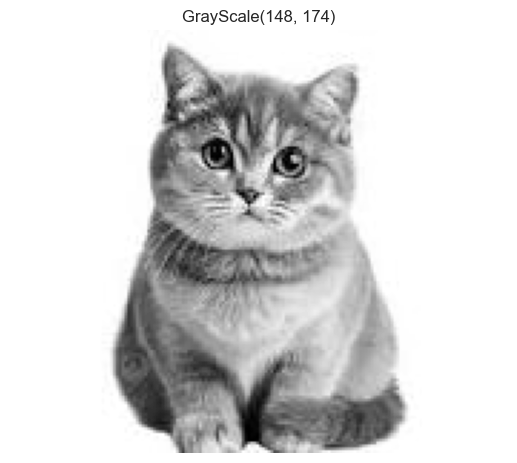

In [3]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
drawImg(img, "Cat")
drawImg(img_gray, "GrayScale")

In [4]:
def convolution(img, img_filter):
    H, W = img.shape[0], img.shape[1]

    F = img_filter.shape[0]    
    new_img = np.zeros((H-F+1, W-F+1))
    for row in range(H-F+1):
        for col in range(W-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row, col] += img[row+i, col+j] * img_filter[i, j]
                if new_img[row, col] > 255:
                    new_img[row, col] = 255
                elif new_img[row, col] < 0:
                    new_img[row, col] = 0
                    
    return new_img

In [11]:
edge_filter = np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]])
edge_filter2 = np.array([[1, 0, 0, 0, -1],[1, 0, 0, 0,  -1],[1, 0, 0, 0,  -1],[1, 0, 0, 0, -1],[1, 0, 0, 0,  -1]])
blur_filter = np.ones((3, 3))/9.0
blur_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

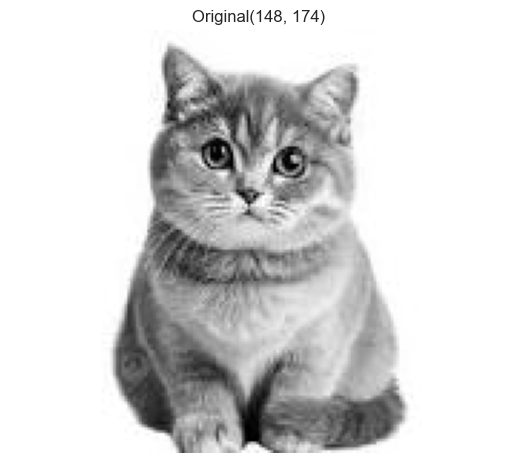

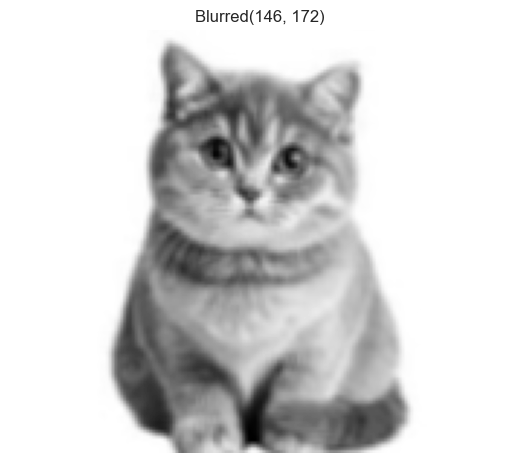

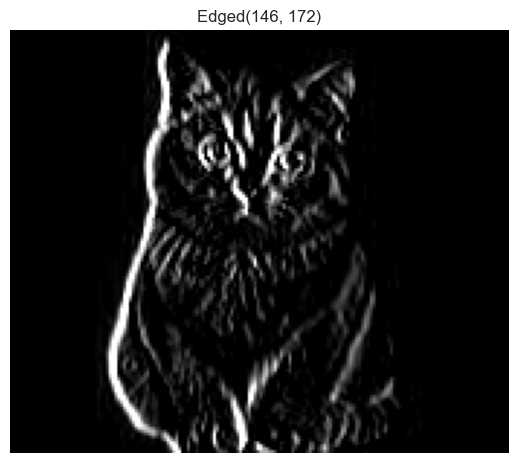

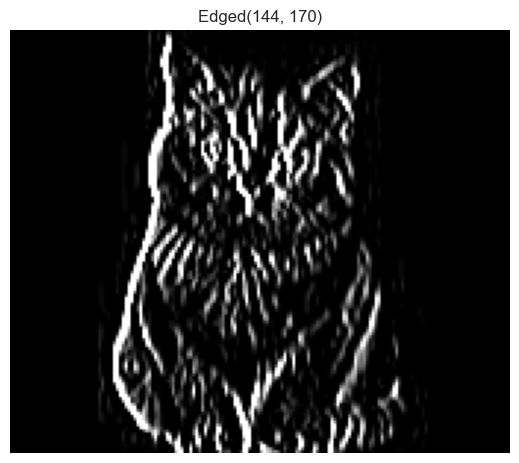

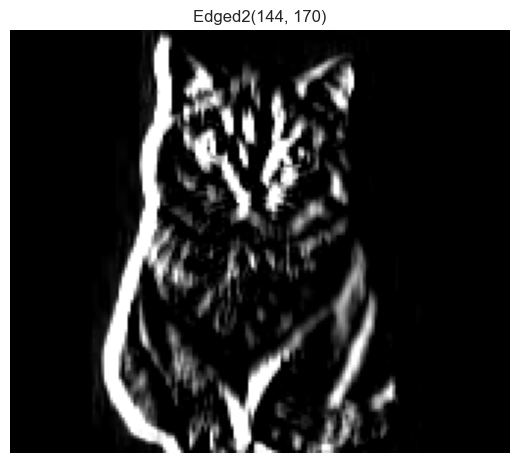

In [13]:
blurred_img = convolution(img_gray, blur_filter)
edged_img = convolution(img_gray, edge_filter)
edged_img3 = convolution(edged_img, edge_filter)
edged_img2 = convolution(img_gray, edge_filter2)
drawImg(img_gray, "Original")
drawImg(blurred_img, "Blurred")
drawImg(edged_img, "Edged")
drawImg(edged_img3, "Edged")
drawImg(edged_img2, "Edged2")

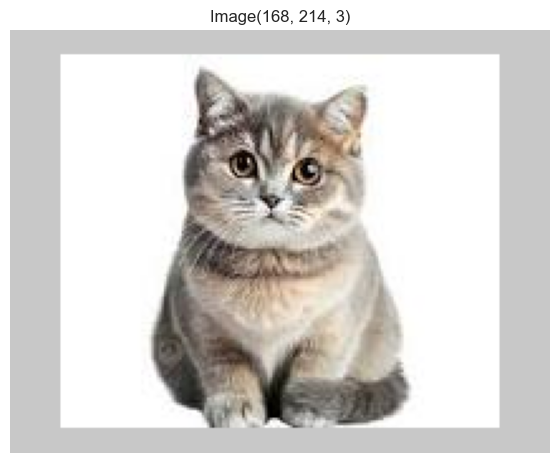

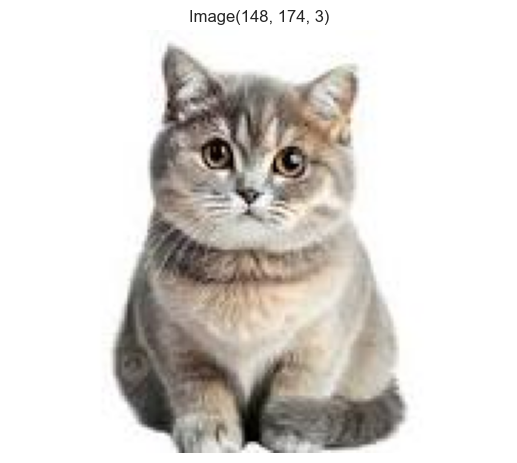

In [7]:
a = np.array([[[1, 1, 9], [1, 1, 2]],[[1, 1, 9], [1, 1, 2]]])
pad_img = np.pad(img, ((10, 10), (20, 20), (0,0)), 'constant', constant_values=200)
drawImg(pad_img)
drawImg(img)

## Implementation of Pooling

In [8]:
arr = np.array([
    [1, 0, 2, 3], 
    [4, 6, 6, 8],
    [3, 1, 1, 0],
    [1, 2, 2, 4]
])

def pooling(X, mode='max'):
    stride = 2
    f = 2
    H, W = X.shape
    H0 = ((H - f) // stride) + 1
    W0 = ((W - f) // stride) + 1
    output = np.zeros((H0, W0))
    for row in range(H0):  
        for col in range(W0):
            r_start = row * stride
            r_end = r_start + f
            c_start = col * stride
            c_end = c_start + f
            X_slice = X[r_start: r_end, c_start: c_end]
            if mode == 'max':
                output[row, col] = np.max(X_slice)
            else:
                output[row, col] = np.mean(X_slice)
    return output

pooling(arr)

array([[6., 8.],
       [3., 4.]])